In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras import layers
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import MaxPool2D 
from keras.layers import Conv2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [3]:
if tf.test.gpu_device_name(): 
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:
    print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [4]:
batch_size = 90
img_height = 224
img_width = 224

In [5]:
import pathlib
data_dir = r"C:\Users\thanaphat turienngam\Desktop\AI Summer\train"
data_dir = pathlib.Path(data_dir)

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 20947 files belonging to 10 classes.
Using 16758 files for training.


In [7]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 20947 files belonging to 10 classes.
Using 4189 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']


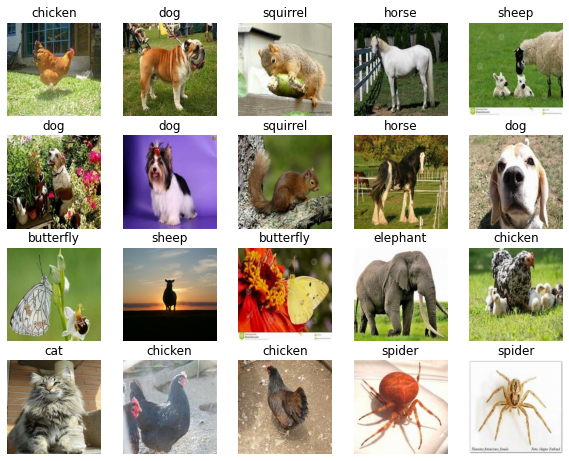

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(20):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [10]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(90, 224, 224, 3)
(90,)


In [11]:
vgg_model = Sequential()
vgg_model.add(Conv2D(input_shape=(img_height,img_width,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
vgg_model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
vgg_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
vgg_model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
vgg_model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
vgg_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
vgg_model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
vgg_model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
vgg_model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
vgg_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
vgg_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
vgg_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [12]:
vgg_model.add(Flatten())
vgg_model.add(Dense(units=4096,activation="relu"))
vgg_model.add(Dense(units=4096,activation="relu"))
vgg_model.add(Dense(units=10, activation="softmax"))

In [13]:
from keras.layers import Dense, Dropout, LSTM, BatchNormalization
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam

In [14]:
import tensorflow as tf

vgg_model.compile(loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
vgg_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [16]:
vgg_model.fit(train_ds,validation_data=val_ds, epochs=50, batch_size=32)


Epoch 1/50


ResourceExhaustedError: Graph execution error:

Detected at node 'sequential/conv2d/Conv2D' defined at (most recent call last):
    File "C:\Users\thanaphat turienngam\anaconda\lib\runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\thanaphat turienngam\anaconda\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\thanaphat turienngam\anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\thanaphat turienngam\anaconda\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
      app.start()
    File "C:\Users\thanaphat turienngam\anaconda\lib\site-packages\ipykernel\kernelapp.py", line 612, in start
      self.io_loop.start()
    File "C:\Users\thanaphat turienngam\anaconda\lib\site-packages\tornado\platform\asyncio.py", line 149, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\thanaphat turienngam\anaconda\lib\asyncio\base_events.py", line 570, in run_forever
      self._run_once()
    File "C:\Users\thanaphat turienngam\anaconda\lib\asyncio\base_events.py", line 1859, in _run_once
      handle._run()
    File "C:\Users\thanaphat turienngam\anaconda\lib\asyncio\events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\thanaphat turienngam\anaconda\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "C:\Users\thanaphat turienngam\anaconda\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
      ret = callback()
    File "C:\Users\thanaphat turienngam\anaconda\lib\site-packages\tornado\gen.py", line 787, in inner
      self.run()
    File "C:\Users\thanaphat turienngam\anaconda\lib\site-packages\tornado\gen.py", line 748, in run
      yielded = self.gen.send(value)
    File "C:\Users\thanaphat turienngam\anaconda\lib\site-packages\ipykernel\kernelbase.py", line 381, in dispatch_queue
      yield self.process_one()
    File "C:\Users\thanaphat turienngam\anaconda\lib\site-packages\tornado\gen.py", line 225, in wrapper
      runner = Runner(result, future, yielded)
    File "C:\Users\thanaphat turienngam\anaconda\lib\site-packages\tornado\gen.py", line 714, in __init__
      self.run()
    File "C:\Users\thanaphat turienngam\anaconda\lib\site-packages\tornado\gen.py", line 748, in run
      yielded = self.gen.send(value)
    File "C:\Users\thanaphat turienngam\anaconda\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "C:\Users\thanaphat turienngam\anaconda\lib\site-packages\tornado\gen.py", line 209, in wrapper
      yielded = next(result)
    File "C:\Users\thanaphat turienngam\anaconda\lib\site-packages\ipykernel\kernelbase.py", line 268, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "C:\Users\thanaphat turienngam\anaconda\lib\site-packages\tornado\gen.py", line 209, in wrapper
      yielded = next(result)
    File "C:\Users\thanaphat turienngam\anaconda\lib\site-packages\ipykernel\kernelbase.py", line 543, in execute_request
      self.do_execute(
    File "C:\Users\thanaphat turienngam\anaconda\lib\site-packages\tornado\gen.py", line 209, in wrapper
      yielded = next(result)
    File "C:\Users\thanaphat turienngam\anaconda\lib\site-packages\ipykernel\ipkernel.py", line 306, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\thanaphat turienngam\anaconda\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "C:\Users\thanaphat turienngam\anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2877, in run_cell
      result = self._run_cell(
    File "C:\Users\thanaphat turienngam\anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2923, in _run_cell
      return runner(coro)
    File "C:\Users\thanaphat turienngam\anaconda\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\thanaphat turienngam\anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3146, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\thanaphat turienngam\anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3338, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\thanaphat turienngam\anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-16-31541377a49b>", line 1, in <module>
      vgg_model.fit(train_ds,validation_data=val_ds, epochs=50, batch_size=32)
    File "C:\Users\thanaphat turienngam\anaconda\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\thanaphat turienngam\anaconda\lib\site-packages\keras\engine\training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\thanaphat turienngam\anaconda\lib\site-packages\keras\engine\training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "C:\Users\thanaphat turienngam\anaconda\lib\site-packages\keras\engine\training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\thanaphat turienngam\anaconda\lib\site-packages\keras\engine\training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "C:\Users\thanaphat turienngam\anaconda\lib\site-packages\keras\engine\training.py", line 859, in train_step
      y_pred = self(x, training=True)
    File "C:\Users\thanaphat turienngam\anaconda\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\thanaphat turienngam\anaconda\lib\site-packages\keras\engine\base_layer.py", line 1096, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\thanaphat turienngam\anaconda\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\thanaphat turienngam\anaconda\lib\site-packages\keras\engine\sequential.py", line 374, in call
      return super(Sequential, self).call(inputs, training=training, mask=mask)
    File "C:\Users\thanaphat turienngam\anaconda\lib\site-packages\keras\engine\functional.py", line 451, in call
      return self._run_internal_graph(
    File "C:\Users\thanaphat turienngam\anaconda\lib\site-packages\keras\engine\functional.py", line 589, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\thanaphat turienngam\anaconda\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\thanaphat turienngam\anaconda\lib\site-packages\keras\engine\base_layer.py", line 1096, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\thanaphat turienngam\anaconda\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\thanaphat turienngam\anaconda\lib\site-packages\keras\layers\convolutional.py", line 248, in call
      outputs = self.convolution_op(inputs, self.kernel)
    File "C:\Users\thanaphat turienngam\anaconda\lib\site-packages\keras\layers\convolutional.py", line 233, in convolution_op
      return tf.nn.convolution(
Node: 'sequential/conv2d/Conv2D'
OOM when allocating tensor with shape[90,64,224,224] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node sequential/conv2d/Conv2D}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_2629]

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["acc"])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()